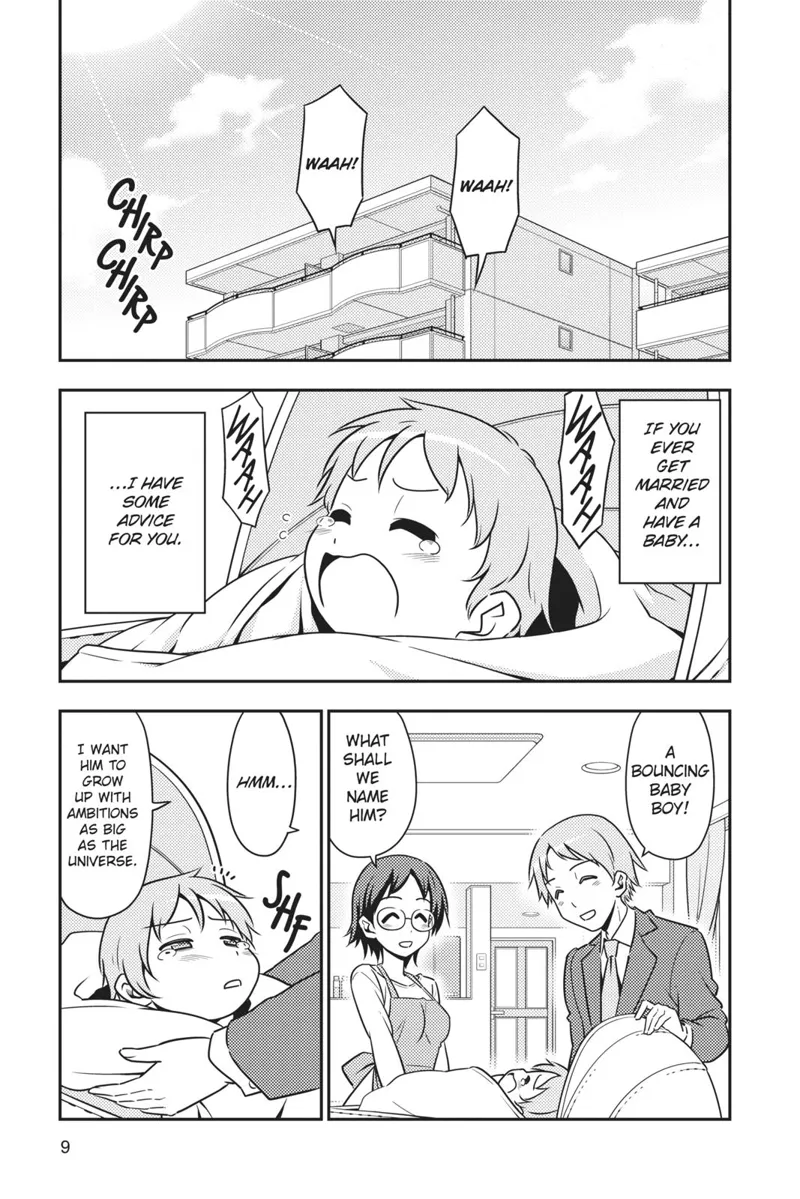

In [7]:
import cv2
import numpy as np
from PIL import Image

# === STEP 1: Load dan Grayscale ===
img = cv2.imread("manga_page1.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# === STEP 2: Adaptive Threshold ===
thresh = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 15, 3
)

# === STEP 3: Morphological Closing (isi celah dalam bubble) ===
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# === STEP 4: Temukan Kontur ===
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

bubble_boxes = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    area = w * h
    if 1000 < area < 50000 and 0.5 < w / h < 3.0:
        bubble_boxes.append((x, y, w, h))

# === STEP 5: Gambar Bubble ===
result = img.copy()
for (x, y, w, h) in bubble_boxes:
    cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)

# === STEP 6: Tampilkan
Image.fromarray(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
